# Projeto Final da Disciplina Mineração de Textos e Web Ministrada pelo Prof. Luciano Barbosa

**Equipe:**
<br>David Soares do Monte
<br>Wanderson Rodrigues Marques


## Descrição do Projeto

O projeto desenvolvido teve a seguinte temática: Construção de um Sistema de Monitoramento de Reviews, e consistiu das seguintes etapas:

1. Seleção de um produto a ser monitorado;
2. Coleta de reviews de sites de e-commerce do produto selecionado, incluindo as seguintes informações:
  * Conteúdo do review;
  * Estrelas de avaliação;
  * Data do review.
3. Criação de classificador de sentimentos utilizando os seguintes critérios:
  * Random Forest com bag-of-words;
  * Redes: CNN, LSTM e BERT;
  * Pré-processamento: com e sem stemming;
  * Métricas de avaliação: F1, precision e recall.
4. Construção de frontend contendo itens como:
  * Plot de reviews positivos e negativos no tempo;
  * Word cloud dos reviews;
  * Reviews mais representativos.

O frontend desenvolvido encontra-se disponível no seguinte endereço:
https://public.tableau.com/views/MonitoramentodeReviews/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link

GitHub do projeto:
<br> ...

### Sumário das Etapas de Desenvolvimento

* **Etapa 0**: Coleta das Reviews
  * Seleção do produto;
  * Coleta das reviews.
* **Etapa 1**: Dataset
  * Informações sobre o dataset
  * Importação das Bibliotecas Necessárias
  * Importação e Pré-processamento do Dataset
* **Etapa 2**: Processamento dos Dados Textuais
  * Importação das Bibliotecas Necessárias
  * Tokenização das Sentenças
  * Importação das Bibliotecas Necessárias
  * Tokenização e Construção do Dicionário de Palavras
* **Etapa 3**: Implementação dos Classificadores
  * Importação de Bibliotecas Necessárias
  * Pré-processamento
  * Agrupamento para Identificação das Reviews mais Representativas
  * C1: Random Forest
  * C2: CNN
    * Importação das Bibliotecas Necessárias
    * Divisão dos Conjuntos de Treinamento, Validação e Teste - CNN
    * Definição do Modelo - CNN
    * Predição e Métricas de Avaliação - CNN
    * Ajuste dos Hiperparâmetros com keras tuner - CNN
    * Predição e Métricas de Avaliação após busca de hiperparâmetros - CNN
  * C3: LSTM
    * Divisão dos Conjuntos de Treino, Validação e Teste - LSTM
    * Definição do Modelo - LSTM
    * Predição e Métricas de Avaliação - LSTM
    * Ajuste dos Hiperparâmetros com keras tuner - LSTM
    * Predição e Métricas de Avaliação após busca de hiperparâmetros - LSTM
  * C4: BERT
    * Divisão dos Conjuntos de Treino, Validação e Teste - BERT
    * Definição do Modelo - BERT
    * Predição e Métricas de Avaliação - BERT
* **Etapa 4**: Resumo das Melhores Métricas para Todos os Modelos
* **Etapa 5**: Frontend
  * Desenvolvimento do frontend no Tableau.

# Etapa 1: Dataset

## Informações sobre o dataset
O dataset é composto originalmente por 5890 avaliações obtidas no site da Amazon Brasil referentes ao produto "Suporte para Notebook, OCTOO, Uptable, UP-BL, Preto" (https://www.amazon.com.br/OCTOO-UP-BL-Suporte-Uptable-Preto/dp/B07BTC67VS/ref=zg-bs_furniture_1/144-8354270-3806822).

## Importação das Bibliotecas Necessárias

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


## Importação e Pré-processamento do Dataset

In [ ]:
# Função para o 'date_parser' para converter a data no momento de leitura do dataset através do 'pd.read_csv'

def date_converter(date):
    month = 0
    month_list = ['janeiro', 'fevereiro', 'março', 'abril', 'maio', 'junho', 'julho', 
                  'agosto', 'setembro', 'outubro', 'novembro', 'dezembro']
    
    date_sep = date.split(' ') # Ex.: '24 de setembro de 2019' => ['24', 'de', 'setembro', 'de', '2019']
    
    for i, m in enumerate(month_list): # Verifica a terceira posição da lista para fazer a conversão do mês
        if date_sep[2] == m:
            month = i + 1
            break
    
    year = int(date_sep[4]) # Última posição da lista 'date_sep'
    day = int(date_sep[0])  # Primeira posição da lista 'date_sep'
            
    date_conv = dt.date(year=year, month=month, day=day) # Compõe a data que será retornada
    
    return date_conv

In [ ]:
# Importa o dataset

df1 = pd.read_csv('av_positivo_projeto_NLP_4560.csv', decimal=',', parse_dates=[2], 
                 date_parser=date_converter, usecols=['reviews', 'star', 'date'])
df2 = pd.read_csv('av_critico_projeto_NLP_1330.csv', decimal=',', parse_dates=[2], 
                 date_parser=date_converter, usecols=['reviews', 'star', 'date'])
df = pd.concat([df1, df2])
df.reset_index(drop=True, inplace=True)

In [ ]:
# Imprime 5 amostras do dataset

df.sample(5)

,reviews,star,date
4458,esta bom da para usar mas na parte direita nao...,5.0,2021-09-14
550,"Como é dobrável, é possível levar junto com o ...",5.0,2020-11-27
1275,O acessório é bem simples mas funciona bem. De...,5.0,2020-10-28
4907,"O negócio é torto. Veio com uma ""perna"" maior ...",1.0,2020-12-06
4685,Super ajudou para manter o notebook na altura ...,3.0,2021-12-24


In [ ]:
# Imprime formato do dataset

print('Shape do dataset:', df.shape)

Shape do dataset: (5890, 3)


* Deste ponto em diante será utilizado o dataset 'df_reviews'

In [ ]:
# Ordena o dataset pela data, cria uma cópia (df_reviews) e faz o reset dos índices

df_reviews = df.sort_values(by=['date']).copy()
df_reviews.reset_index(drop=True, inplace=True)

# Adiciona a coluna 'sentiment' baseado no critério: positivo se star > 3 e negativo caso contrário

df_reviews['sentiment'] = df_reviews['star'].apply(lambda v: 'positive' if v > 3 else 'negative')

# Reordena as colunas do dataset

df_reviews = df_reviews[['date', 'reviews', 'star', 'sentiment']]

# Redefine os tipos dos dados

df_reviews['reviews'] = df_reviews['reviews'].astype('category')
df_reviews['star'] = df_reviews['star'].astype('int8')
df_reviews['star'] = df_reviews['star'].astype('category')
df_reviews['sentiment'] = df_reviews['sentiment'].astype('category')

In [ ]:
df_reviews.head()

,date,reviews,star,sentiment
0,2019-04-07,"Leve, simples, ocupa pouco espaço.",5,positive
1,2019-09-24,"Produto de boa qualidade, tanto pela aparência...",4,positive
2,2019-10-10,"Duro, pequeno e não tão resistente. Já desinca...",2,negative
3,2019-10-31,"Fácil de montar e desmontar, pode ser posicion...",5,positive
4,2019-12-02,"Prático, leve e resistente",5,positive


In [ ]:
# Intervalo de datas no qual foram capturadas os reviews

print('Período das reviews: ', df_reviews['date'].min().strftime('%Y-%m-%d'), 'a',\
      df_reviews['date'].max().strftime('%Y-%m-%d'))

Período das reviews:  2019-04-07 a 2022-03-22


In [ ]:
# Verificação de dados ausentes

(df_reviews.isna().sum())

date          0
reviews      59
star          0
sentiment     0
dtype: int64

In [ ]:
# Remove instâncias com reviews vazias

df_reviews.dropna(axis=0, how='any', inplace=True, subset=['reviews'])
df_reviews.reset_index(drop=True, inplace=True)
df_reviews.shape

(5831, 4)

In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5831 entries, 0 to 5830
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       5831 non-null   datetime64[ns]
 1   reviews    5831 non-null   category      
 2   star       5831 non-null   category      
 3   sentiment  5831 non-null   category      
dtypes: category(3), datetime64[ns](1)
memory usage: 240.1 KB


In [ ]:
# Descrição das variáveis categóricas

df_reviews.describe(include='category')

,reviews,star,sentiment
count,5831,5831,5831
unique,5413,5,2
top,Muito bom,5,positive
freq,64,3552,4520


In [ ]:
# Verificação do balaceamento das classes - coluna 'sentiment'

per_var = pd.DataFrame()
per_var['count'] = df_reviews['sentiment'].value_counts()
per_var['%'] = per_var['count']/len(df_reviews['sentiment'])*100
per_var

,count,%
positive,4520,77.516721
negative,1311,22.483279


# Etapa 2: Processamento dos Dados Textuais

## Importação das Bibliotecas Necessárias

In [ ]:
#from collections import Counter
from collections import Counter
import string
import nltk
#import spacy as sp
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stemmer = PorterStemmer()

nltk.download('stopwords')
nltk.download('punkt') # A data model created by Jan Strunk that NLTK uses to split full texts into word lists

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dsm3\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dsm3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Tokenização das Sentenças

### Importação das Bibliotecas Necessárias

In [ ]:
# !pip install gensim==4.1.2

In [ ]:
import gensim
import gensim.downloader
gensim.__version__

'4.1.2'

In [ ]:
from gensim.models import KeyedVectors #, Word2Vec 

### Tokenização e Construção do Dicionário de Palavras

* word2vec pré-treinado em português:
<br>http://www.nilc.icmc.usp.br/nilc/index.php/repositorio-de-word-embeddings-do-nilc

In [ ]:
word2vc_vectors = KeyedVectors.load_word2vec_format('cbow_s100.txt')

In [ ]:
# Tokenização
sentences_set_amz = []
sentence = []
dict_pt = {}
punct_set = list(string.punctuation) + ['..', '...', "''", "'''", '``', '```', '*', '**', '***', '…', '^', '^^', '-']
stop_words = set(stopwords.words('portuguese'))

for item in df_reviews['reviews']:
  words = word_tokenize(item, language='portuguese')
  for token in words:
    token = token.lower()                                        # Todas as palavras em minúsculo
    if token not in punct_set and token not in stop_words:       # Verifica se não é pontuação ou 'stop word'
      while (len(token) > 0 and token[0] in punct_set):          # Removendo pontuação do início das palavras
        token = token[1:]
      while (len(token) > 0 and token[-1] in punct_set):         # Removendo pontuação do fim das palavras
        token = token[:-1]
      if len(token) > 1 and token in word2vc_vectors.key_to_index: # Verifica se modelo pré- treinado contém o token
        sentence.append(token) 
  sentences_set_amz.append(sentence)

  word_freq = Counter(sentence)

  for word,freq in word_freq.items():
    if word in dict_pt.keys():
      dict_pt[word] = dict_pt[word] + freq
    else:
      dict_pt[word] = freq
  sentence = []

sentences_set = np.asarray(sentences_set_amz, dtype='object')

print('Nº de sentenças:', len(sentences_set))
print("Tamanho do vocabulário: ", len(dict_pt))
print("Vocabulário:\n", sorted(dict_pt.keys()))

Nº de sentenças: 5831
Tamanho do vocabulário:  4853
Vocabulário:
 ['aba', 'abafado', 'abaixa', 'abaixar', 'abaixasse', 'abaixo', 'abas', 'aberta', 'aberto', 'abertura', 'aberturas', 'abraçar', 'abraço', 'abre', 'abri', 'abrindo', 'abrir', 'abriu', 'abro', 'abrupta', 'absolutamente', 'absurda', 'absurdamente', 'absurdo', 'acaba', 'acabada', 'acabado', 'acabam', 'acabamento', 'acabamentos', 'acabando', 'acabar', 'acabaram', 'acabei', 'acabo', 'acabou', 'aceita', 'aceitam', 'aceitável', 'acer', 'acerca', 'acerta', 'acertamos', 'acertando', 'acertar', 'acertava', 'acertei', 'acertou', 'acertá-lo', 'acessível', 'acessório', 'acessórios', 'acha', 'achado', 'achando', 'achar', 'achava', 'achei', 'achei-o', 'achem', 'acho', 'achou', 'acidentalmente', 'acidente', 'acidentes', 'acima', 'acionei', 'acomoda', 'acomodado', 'acomodar', 'acomodou', 'acompanha', 'acompanhado', 'acompanham', 'acompanhamento', 'acompanhar', 'acondiciona', 'acondicionada', 'aconselharia', 'aconselho', 'aconselhável', 'ac

* Transfere o dicionário de palavras e suas frequências de ocorrência para um dataframe e exibe as 10 palavras mais frequentes.

In [ ]:
dict_pt_df = pd.DataFrame(sorted(list(dict_pt.items()), key=lambda v: v[1], reverse=True), columns=['words', 'freq'])
dict_pt_df.head(10)

,words,freq
0,produto,2081
1,notebook,1465
2,bem,1328
3,bom,1286
4,suporte,1044
5,fica,832
6,fácil,687
7,pouco,615
8,veio,577
9,torto,574


* Verifica se há alguma sentença vazia e remove do conjunto de sentenças e do dataset.

In [ ]:
null_sentences = []

for i,sentence in enumerate(sentences_set):
  if len(sentence) == 0:
    null_sentences.append(i)
    #print(sentence)
print(null_sentences)

sentences_set = np.delete(sentences_set, null_sentences)

# Atualiza a base de dados removendo as instâncias correspondentes a sentenças vazias
if len(null_sentences) > 0:
  df_reviews = df_reviews.drop(null_sentences, axis=0)
  df_reviews.reset_index(drop=True, inplace=True)

[496, 1588, 1692, 1815, 2076, 2544, 2583, 3141, 3214, 3253, 4498, 4591, 4830, 5717]


In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5817 entries, 0 to 5816
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       5817 non-null   datetime64[ns]
 1   reviews    5817 non-null   category      
 2   star       5817 non-null   category      
 3   sentiment  5817 non-null   category      
dtypes: category(3), datetime64[ns](1)
memory usage: 239.9 KB


In [ ]:
#df_reviews.to_csv('df_reviews_processed.csv')

In [ ]:
# Imprime um exemplo de sentença tokenizada
print(sentences_set[0])

['leve', 'simples', 'ocupa', 'pouco', 'espaço']


# Etapa 3: Implementação dos Classificadores

## Importação de Bibliotecas Necessárias

In [ ]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
# from sklearn.pipeline import Pipeline

## Pré-processamento

* Pré-processamento da variável alvo: y = df_reviews['sentiment']

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_reviews['sentiment'])

print('Classes numéricas:', np.unique(y))
print('Classes:', list(label_encoder.inverse_transform(np.unique(y))))
print('Nº de elementos de y:', len(y))

Classes numéricas: [0 1]
Classes: ['negative', 'positive']
Nº de elementos de y: 5817


* Passando as sentenças tokenizadas para o modelo treinado para obter o conjunto de embeddings 'X'.

In [ ]:
X = []
max_len = 0

for i,sentence in enumerate(sentences_set):
  vector = word2vc_vectors[sentence]
  X.append(vector)
  max_len = max(max_len, len(vector))

print('max_len:', max_len)
print('N° de elementos de X:', len(X))

max_len: 125
N° de elementos de X: 5817


* Redimensionamento e normalização dos vetores (X).

In [ ]:
VECTOR_SIZE = 100

def transform(exemplos, dimension):
  results = np.zeros((len(exemplos), dimension, VECTOR_SIZE))
  for i, sequence in enumerate(exemplos):
    results[i, (dimension - len(sequence)):, :] = sequence    # Padding a esquerda
  return results
 
X = transform(X, max_len)

# Normalização de X para intervalo [-1,1]
X_min = X.min()
X_max = X.max()
range_X = X_max - X_min

X = ((X - X_min)/range_X - 0.5) * 2

print('Range após normalização:', [X.min(), X.max()])
print(X.shape)

Range após normalização: [-1.0, 1.0]
(5817, 125, 100)


## Agrupamento para Identificação das Reviews mais Representativas

* Material de referência: 
<br> https://dylancastillo.co/nlp-snippets-cluster-documents-using-word2vec/#generate-document-vectors

* Vetorização e redução das sentenças para um vetor único por meio da média dos vetores.

In [ ]:
# Adaptado do material de referência

def mean_vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding (version 4.1.2)

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
          vectors.append(model[token])
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features
    
vectorized_docs = mean_vectorize(sentences_set, model=word2vc_vectors)

print('Shape do vetor médio gerado para cada reviews após o embedding:', (len(vectorized_docs), len(vectorized_docs[0])))

Shape do vetor médio gerado para cada reviews após o embedding: (5817, 100)


* Busca do número ótimo de clusters através da análise de silhueta. O algoritmo de clusterização que está sendo utilizado é o k-means.

In [ ]:
# Adaptado do material de referência

seed = 1275
SAMPLE_SIZE = 350
silhouette_score_list = []

for k in np.arange(2,21):
  km = KMeans(n_clusters=k, n_init=100, init='k-means++', random_state=seed).fit(vectorized_docs)
  silhouette_score_list.append(silhouette_score(vectorized_docs, km.labels_, metric="euclidean", sample_size=350, random_state=seed))

best_score = max(silhouette_score_list)
best_cluster = silhouette_score_list.index(best_score) + 2

print('Melhor silhueta:', best_score)
print('Nº de Clusters:', best_cluster)

Melhor silhueta: 0.33688414
Nº de Clusters: 3


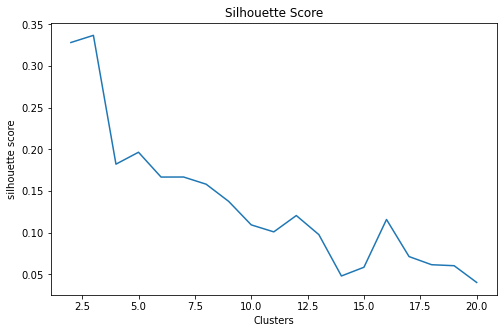

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(list(np.arange(2,21)), silhouette_score_list)
plt.title('Silhouette Score')
plt.xlabel('Clusters')
plt.ylabel('silhouette score')
plt.show()

* Calcula os parâmetros de silhueta de cada cluster.

In [ ]:
# Adaptado do material de referência

def kmeans_clusters(
    X, 
    k, 
    mb, 
    print_silhouette_values, 
):
    """Generate clusters and print Silhouette metrics using Kmeans

    Args:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.

    Returns:
        Trained clustering model and labels based on X.
    """
    km = KMeans(n_clusters=k, n_init=100, init='k-means++', random_state=seed).fit(X)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, km.labels_):0.2f}")
    print(f"Inertia:{km.inertia_}")

    if print_silhouette_values:
        sample_silhouette_values = silhouette_samples(X, km.labels_)
        print(f"Silhouette values:")
        silhouette_values = []
        for i in np.arange(k):
            cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
            silhouette_values.append(
                (
                    i,
                    cluster_silhouette_values.shape[0],
                    cluster_silhouette_values.mean(),
                    cluster_silhouette_values.min(),
                    cluster_silhouette_values.max(),
                )
            )
        silhouette_values = sorted(
            silhouette_values, key=lambda tup: tup[2], reverse=True
        )
        for s in silhouette_values:
            print(
                f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
            )
    return km, km.labels_

In [ ]:
clustering, cluster_labels = kmeans_clusters(
    X=vectorized_docs,
    k=best_cluster,
    mb=500,
    print_silhouette_values=True,
)

For n_clusters = 3
Silhouette coefficient: 0.36
Inertia:5032.737763414652
Silhouette values:
    Cluster 0: Size:5239 | Avg:0.38 | Min:0.02 | Max: 0.52
    Cluster 1: Size:449 | Avg:0.25 | Min:-0.08 | Max: 0.53
    Cluster 2: Size:129 | Avg:0.08 | Min:-0.23 | Max: 0.39


* Redução de dimensionalidade com o PCA para visualização dos agrupamentos

In [ ]:
scaler = StandardScaler()
scaled_docs = scaler.fit_transform(vectorized_docs)
pca = PCA(n_components=2)
pca_docs = pca.fit_transform(scaled_docs)
pca_docs.shape

(5817, 2)

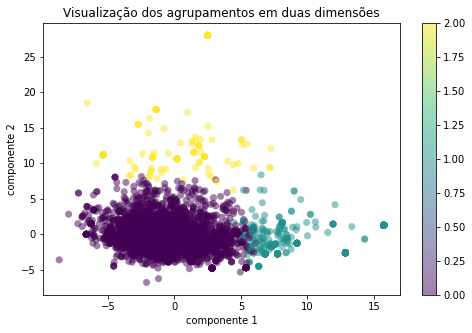

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(pca_docs[:, 0], pca_docs[:, 1], c=cluster_labels, edgecolor='none', alpha=0.5, cmap='viridis', s=50)
plt.title('Visualização dos agrupamentos em duas dimensões')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.colorbar();

In [ ]:
# Cria um df relacionando: 'sentiment', 'reviews', 'tokens', 'clusters'.
df_clusters = pd.DataFrame({
    "sentiment": df_reviews['sentiment'],
    "reviews": df_reviews['reviews'],
    "tokens": [" ".join(text) for text in sentences_set],
    "cluster": cluster_labels
})

In [ ]:
df_clusters.sample(5)

,sentiment,reviews,tokens,cluster
3124,positive,"Não é ajustável , um pouco difícil de concerta...",ajustável pouco difícil concertar nivelamentos...,0
5342,positive,"Chegou em perfeito estado, muito bem embalado ...",chegou perfeito estado bem embalado antes praz...,0
4546,positive,Nada de excepcional.,nada excepcional,0
2183,negative,"Ele é péssimo para usar, não fica estável na m...",péssimo usar fica estável mesa pra adaptar alt...,0
2671,negative,"O produto veio torto, deixando o laptop, també...",produto veio torto deixando laptop torto olhar...,0


In [ ]:
#df_clusters.to_csv('cluster_selection.csv')

numpy.argsort: Returns the indices that would sort an array
<br> https://numpy.org/doc/stable/reference/generated/numpy.argsort.html
<br> numpy.linalg.norm: Matrix or vector norm
<br> https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html

* Documentos mais representativos para cada cluster.

In [ ]:
# Adaptado do material de referência
most_representative_docs_c0 = np.argsort(np.linalg.norm(vectorized_docs - clustering.cluster_centers_[0], axis=1))
most_representative_docs_c1 = np.argsort(np.linalg.norm(vectorized_docs - clustering.cluster_centers_[1], axis=1))
most_representative_docs_c2 = np.argsort(np.linalg.norm(vectorized_docs - clustering.cluster_centers_[2], axis=1))

for d in most_representative_docs_c0[:5]:
    print(df_clusters.iloc[d])
    print("-------------")

sentiment                                             positive
reviews      Quando comprei fiquei com medo de vir torto, d...
tokens       comprei fiquei medo vir torto devido algumas a...
cluster                                                      0
Name: 3306, dtype: object
-------------
sentiment                                             negative
reviews      O produto veio desnivelado, porém quando é col...
tokens       produto veio desnivelado porém colocado notebo...
cluster                                                      0
Name: 1249, dtype: object
-------------
sentiment                                             positive
reviews      Produto de excelência para quem deseja ergonom...
tokens       produto excelência deseja ergonomia pois realm...
cluster                                                      0
Name: 4691, dtype: object
-------------
sentiment                                             positive
reviews      Pesquisei muito antes de escolher qual suporte..

* Armazena em um dataframe os 30 documentos (reviews) mais representativas de cada cluster.

In [ ]:
# Distâncias de cada documento para cada um dos centroídes
distance_docs_c0 = np.sort(np.linalg.norm(vectorized_docs - clustering.cluster_centers_[0], axis=1))
distance_docs_c1 = np.sort(np.linalg.norm(vectorized_docs - clustering.cluster_centers_[1], axis=1))
distance_docs_c2 = np.sort(np.linalg.norm(vectorized_docs - clustering.cluster_centers_[2], axis=1))

In [ ]:
# Adaptado do material de referência
# 30 reviews mais representativas em cada cluster
df_reviews_importance_c0 = df_clusters.iloc[most_representative_docs_c0[:30]]
df_reviews_importance_c1 = df_clusters.iloc[most_representative_docs_c0[:30]]
df_reviews_importance_c2 = df_clusters.iloc[most_representative_docs_c2[:30]]

df_reviews_importance = pd.concat([df_reviews_importance_c0, df_reviews_importance_c1, df_reviews_importance_c2])
df_reviews_importance['position'] = np.concatenate((most_representative_docs_c0[:30], most_representative_docs_c1[:30],
                                                  most_representative_docs_c2[:30]), axis=None)
df_reviews_importance['distance'] = np.concatenate((distance_docs_c0[:30], distance_docs_c1[:30],
                                                  distance_docs_c2[:30]), axis=None)

df_reviews_importance.reset_index(drop=True, inplace=True)
df_reviews_importance

,sentiment,reviews,tokens,cluster,position,distance
0,positive,"Quando comprei fiquei com medo de vir torto, d...",comprei fiquei medo vir torto devido algumas a...,0,3306,0.279469
1,negative,"O produto veio desnivelado, porém quando é col...",produto veio desnivelado porém colocado notebo...,0,1249,0.281547
2,positive,Produto de excelência para quem deseja ergonom...,produto excelência deseja ergonomia pois realm...,0,4691,0.286831
3,positive,Pesquisei muito antes de escolher qual suporte...,pesquisei antes escolher suporte iria comprar ...,0,4893,0.289200
4,positive,"O produto é simples, mas bem construído. A emb...",produto simples bem construído embalagem emite...,0,4034,0.290432
...,...,...,...,...,...,...
85,negative,Não gostei ... veio torto,gostei veio torto,2,815,1.071072
86,positive,"demorei pra entender, mas gostei muito",demorei pra entender gostei,2,2590,1.079721
87,positive,muito top. gostei bastante e recomendo.,top gostei bastante recomendo,2,3850,1.084774
88,positive,"Gostei, é razoável!",gostei razoável,2,4982,1.091918


In [ ]:
#df_reviews_importance.to_csv('reviews_importance_distance.csv')

## C1: Random Forest

* Executa a busca de parâmetros para o Random Forest utilizando o k-fold estratificado com k = 10.

In [ ]:
seed = 1275
X_rfc = np.reshape(X,(X.shape[0], max_len*VECTOR_SIZE))
y_rfc = y

# Divisao da base de dados em treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X_rfc, y_rfc, test_size=0.2, stratify=y_rfc, random_state=seed)
#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, stratify=y_train, random_state=seed)

# Instanciando o modelo
rfc = RandomForestClassifier(random_state=seed)

# K-fold estratificado com k = 10
cv = StratifiedKFold(n_splits=10)

# definição dos parâmetros para a árvore de decisão
param_distributions = { 
                        'n_estimators': [10,11,12,15,16,17,18,19,20],
                        'criterion': ['gini', 'entropy'],
                        'max_depth': [12,14,15,16,17,18,20],
                        'min_samples_split': [15,16,17,18,19,20,21,25],
                        'min_samples_leaf': [4,5,6,7,8,9,10],
                        'max_features':['auto', 'sqrt'] #, 'log2']
                      }

# define random search for decision tree
rnd_search_rfc = RandomizedSearchCV(  estimator=rfc, 
                                      param_distributions = param_distributions, 
                                      n_iter=25, scoring='f1', 
                                      n_jobs=3, cv=cv, random_state=seed
                                    )
# execute search
result_rfc = rnd_search_rfc.fit(X_train, y_train)

* Sumariza as métricas de avaliação para o Random Forest.

In [ ]:
# summarize result for random forest
print('=========Random Search Results for RandomForest==========')
print('Best Score: %s' % result_rfc.best_score_)
print('Best Hyperparameters: %s' % result_rfc.best_params_)

# Instanciando e avaliando o modelo
RFC = RandomForestClassifier(**result_rfc.best_params_, random_state=seed)

model = RFC.fit(X_train, y_train)
y_predicted = RFC.predict(X_test)

print('\nDesempenho médio do RandomForest:')

cv_results = cross_val_score(RFC, X_train, y_train, cv=cv, scoring='f1')
#cv_models_results['randomForest'] = cv_results

name = 'RandomForest'
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

print("\nAcuracia do Random Forest: Treinamento",  RFC.score(X_train, y_train)," Teste", RFC.score(X_test, y_test))
print("\nClassification report:\n", classification_report(y_test, y_predicted))
print("Confusion matrix:\n", confusion_matrix(y_test, y_predicted))

=========Random Search Results for RandomForest==========
Best Score: 0.8752186941799535
Best Hyperparameters: {'n_estimators': 19, 'min_samples_split': 18, 'min_samples_leaf': 8, 'max_features': 'auto', 'max_depth': 14, 'criterion': 'entropy'}

Desempenho médio do RandomForest:
RandomForest: 0.875219 (0.002981)

Acuracia do Random Forest: Treinamento 0.8850204169353105  Teste 0.7869415807560137

Clasification report:
               precision    recall  f1-score   support

           0       0.93      0.05      0.10       261
           1       0.79      1.00      0.88       903

    accuracy                           0.79      1164
   macro avg       0.86      0.53      0.49      1164
weighted avg       0.82      0.79      0.70      1164

Confusion matrix:
 [[ 14 247]
 [  1 902]]


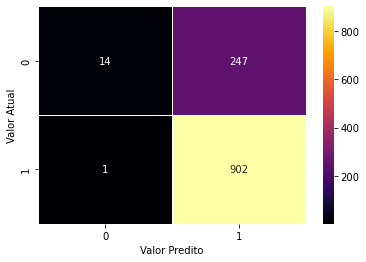

In [ ]:
# Matriz de confusão com heatmap
rf_confusion_matrix = pd.crosstab(y_test, y_predicted, rownames=['Valor Atual'], colnames=['Valor Predito'])

sn.heatmap(rf_confusion_matrix, annot=True, fmt="d", cmap='inferno', linewidths=.5)
plt.show()

## C2: CNN

### Importação das Bibliotecas Necessárias

Tensorflow Addons: https://github.com/tensorflow/addons

In [ ]:
#!pip install tensorflow-addons

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_addons as tfa
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D #Embedding, Input

In [ ]:
print("Tensorflow Version: ", tf.__version__)
print("GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("Tensorflow Adons Version: ", tfa.__version__)

Tensorflow Version:  2.6.0
GPUs Available:  1
Tensorflow Adons Version:  0.16.1


### Divisão dos Conjuntos de Treinamento, Validação e Teste - CNN

In [ ]:
seed = 1275
# Divisao da base de dados em treinamento, validacao e teste
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X, y, test_size=0.1, stratify=y, random_state=seed)
X_train_cnn, X_valid_cnn, y_train_cnn, y_valid_cnn = train_test_split(X_train_cnn, y_train_cnn, test_size = 0.2, stratify=y_train_cnn, random_state=seed)

print('Shape do Conjunto de Treino: ', X_train_cnn.shape)
print('Shape das labels de Treino: ', y_train_cnn.shape)
print('Shape do Conjunto de Validação: ', X_valid_cnn.shape)
print('Shape das labels de Validação: ', y_valid_cnn.shape)
print('Shape do Conjunto de Teste: ', X_test_cnn.shape)
print('Shape das labels de Teste: ', y_test_cnn.shape)

Shape do Conjunto de Treino:  (4188, 125, 100)
Shape das labels de Treino:  (4188,)
Shape do Conjunto de Validação:  (1047, 125, 100)
Shape das labels de Validação:  (1047,)
Shape do Conjunto de Teste:  (582, 125, 100)
Shape das labels de Teste:  (582,)


### Definição do Modelo - CNN

In [ ]:
INPUT_SHAPE = (max_len, VECTOR_SIZE,)

# Hiperparameters
FILTERS_LAYER_1=32
KERNEL_SIZE=3
HIDDEN_LAYER_1_NODES=20 #100
HIDDEN_LAYER_2_NODES=10 #50
DROPOUT_PROB=0.30

model_cnn = keras.models.Sequential([
    keras.layers.Conv1D(FILTERS_LAYER_1, KERNEL_SIZE, strides= 1, padding="same", activation='relu', input_shape=INPUT_SHAPE),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(HIDDEN_LAYER_1_NODES, activation='relu'),
    keras.layers.Dropout(DROPOUT_PROB),
    keras.layers.Dense(HIDDEN_LAYER_2_NODES, activation='relu'),
    keras.layers.Dropout(DROPOUT_PROB),
    keras.layers.Dense(1, activation='sigmoid')
])

# Obs.: A última camada utiliza função de ativação sigmoid por se tratar de uma 
# classificação binária: a avaliação é positiva ou negativa

model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 125, 32)           9632      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                660       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1

In [ ]:
from tensorflow_addons.metrics.f_scores import F1Score
# F1Score = tfa.metrics.F1Score(num_classes=2, average="micro", threshold=0.5)
model_cnn.compile(loss="binary_crossentropy", optimizer="adam", metrics= F1Score(num_classes=2, average="micro", threshold=0.6))

In [ ]:
BATCH_SIZE = 25    # Tamanho do batch de treinamento
N_EPOCHS = 100

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10) 
# This callback will stop the training when there is no improvement in the loss for five consecutive epochs.

history_cnn = model_cnn.fit(
                            x=X_train_cnn, 
                            y=y_train_cnn, 
                            epochs=N_EPOCHS, 
                            batch_size=BATCH_SIZE, 
                            verbose='auto', 
                            validation_data=(X_valid_cnn,y_valid_cnn),
                            callbacks=[callback],
                          )
print('\nQuantidade de épocas executadas: ', len(history_cnn.history['val_loss']))

Epoch 1/100
168/168 [==============================] - 7s 8ms/step - loss: 0.5657 - f1_score: 0.7886 - val_loss: 0.5066 - val_f1_score: 0.8736
Epoch 2/100
168/168 [==============================] - 1s 6ms/step - loss: 0.4823 - f1_score: 0.8508 - val_loss: 0.4185 - val_f1_score: 0.8981
Epoch 3/100
168/168 [==============================] - 1s 6ms/step - loss: 0.4216 - f1_score: 0.8798 - val_loss: 0.3865 - val_f1_score: 0.9009
Epoch 4/100
168/168 [==============================] - 1s 6ms/step - loss: 0.3746 - f1_score: 0.8937 - val_loss: 0.3686 - val_f1_score: 0.8922
Epoch 5/100
168/168 [==============================] - 1s 6ms/step - loss: 0.3399 - f1_score: 0.9057 - val_loss: 0.3588 - val_f1_score: 0.8760
Epoch 6/100
168/168 [==============================] - 1s 6ms/step - loss: 0.3189 - f1_score: 0.9092 - val_loss: 0.3481 - val_f1_score: 0.8946
Epoch 7/100
168/168 [==============================] - 1s 6ms/step - loss: 0.2840 - f1_score: 0.9217 - val_loss: 0.3571 - val_f1_score: 0.9030

* Loss e F1-score para os conjuntos de validação e teste.

In [ ]:
valid_loss_cnn, valid_f1_score_cnn = model_cnn.evaluate(X_valid_cnn, y_valid_cnn, verbose = 'auto')

print('Valid Loss:', valid_loss_cnn)
print('Valid F1 Score:', valid_f1_score_cnn)

Valid Loss: 0.5148536562919617
Valid F1 Score: 0.9088729023933411


In [ ]:
test_loss_cnn, test_f1_score_cnn = model_cnn.evaluate(X_test_cnn, y_test_cnn, verbose = 'auto')

print('Test Loss:', test_loss_cnn)
print('Test F1 Score:', test_f1_score_cnn)

Test Loss: 0.4390476942062378
Test F1 Score: 0.908695638179779


* Plotagem do histórico de treinamento  do modelo - CNN

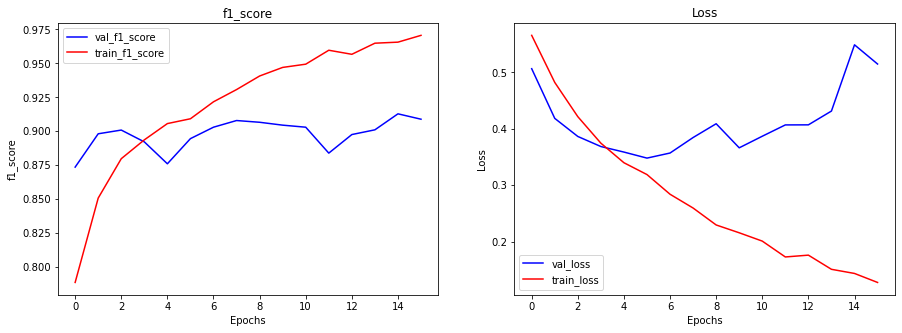

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['val_f1_score'], color='blue', label='val_f1_score')
plt.plot(history_cnn.history['f1_score'], color='red', label='train_f1_score')
plt.title('f1_score')
plt.xlabel('Epochs')
plt.ylabel('f1_score')
#plt.ylim(None, 1)
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['val_loss'], color='blue', label='val_loss')
plt.plot(history_cnn.history['loss'], color='red', label='train_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.ylim(0, None);
plt.legend();

### Predição e Métricas de Avaliação - CNN

In [ ]:
y_predicted_cnn = (model_cnn.predict(X_test_cnn) > 0.5).astype('int8')
print(np.reshape(y_predicted_cnn, len(y_predicted_cnn)))

[0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0
 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 

In [ ]:
print("\nClassification report:\n", classification_report(y_test_cnn, y_predicted_cnn))
print("Confusion matrix:\n", confusion_matrix(y_test_cnn, y_predicted_cnn))


Clasification report:
               precision    recall  f1-score   support

           0       0.72      0.61      0.66       131
           1       0.89      0.93      0.91       451

    accuracy                           0.86       582
   macro avg       0.81      0.77      0.79       582
weighted avg       0.85      0.86      0.85       582

Confusion matrix:
 [[ 80  51]
 [ 31 420]]


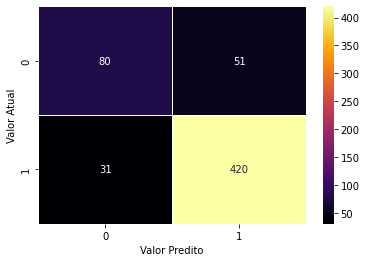

In [ ]:
# Matriz de confusão com heatmap
cnn_confusion_matrix = pd.crosstab(np.reshape(y_test_cnn, len(y_test_cnn)), np.reshape(y_predicted_cnn, len(y_predicted_cnn)), rownames=['Valor Atual'], colnames=['Valor Predito'])

sn.heatmap(cnn_confusion_matrix, annot=True, fmt="d", cmap='inferno', linewidths=.5)
plt.show()

### Ajuste dos Hiperparâmetros com keras tuner - CNN

* Material de Referência: https://www.tensorflow.org/tutorials/keras/keras_tuner

In [ ]:
#!pip install -q -U keras-tuner

In [ ]:
import keras_tuner as kt

* Definindo o modelo e determinando quais hiperparâmetros serão testados.

In [ ]:
from tensorflow_addons.metrics.f_scores import F1Score
METRICS_F1 = F1Score(num_classes=2, average="micro", threshold=0.6)

def model_cnn_builder(hp):
  # Hiperparameters
  KERNEL_SIZE=3
  DROPOUT_PROB=0.30
  INPUT_SHAPE = (max_len, VECTOR_SIZE,)

  HP_FILTERS_LAYER_1 = hp.Int('filters_1', min_value=16, max_value=256, step=16)
  HP_HIDDEN_LAYER_1_UNITS = hp.Int('units_1', min_value=10, max_value=100, step=10)
  HP_HIDDEN_LAYER_2_UNITS = hp.Int('units_2', min_value=10, max_value=50, step=10)

  model_cnn_tn = keras.models.Sequential([
      keras.layers.Conv1D(filters=HP_FILTERS_LAYER_1, kernel_size=KERNEL_SIZE, strides= 1, padding="same", activation='relu', input_shape=INPUT_SHAPE),
      keras.layers.GlobalMaxPooling1D(),
      keras.layers.Dense(units=HP_HIDDEN_LAYER_1_UNITS, activation='relu'),
      keras.layers.Dropout(DROPOUT_PROB),
      keras.layers.Dense(units=HP_HIDDEN_LAYER_2_UNITS, activation='relu'),
      keras.layers.Dropout(DROPOUT_PROB),
      keras.layers.Dense(1, activation='sigmoid')
  ])
    
  #from tensorflow_addons.metrics.f_scores import F1Score

  HP_LEARNING_RATE = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5, 1e-6])

  model_cnn_tn.compile(
      loss="binary_crossentropy", 
      optimizer=keras.optimizers.Adam(learning_rate=HP_LEARNING_RATE), 
      metrics=METRICS_F1
  )

  return model_cnn_tn

* Definindo o objetivo da busca de hiperparâmetros e determinando o número máximo de épocas.

In [ ]:
MAX_EPOCHS = 150

tuner_cnn = kt.Hyperband(
                          model_cnn_builder,
                          objective= kt.Objective('val_loss', direction='min'), #("val_f1_score", direction="max"),
                          max_epochs=MAX_EPOCHS,
                          factor=3,
                          directory='cnn_tuner_dir_2',
                          project_name='cnn_tuner_val_loss_1'
                        )
#tuner_cnn.search_space_summary()

* Executa a busca de hiperparâmetros.

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

BATCH_SIZE = 25    # Tamanho do batch de treinamento
N_EPOCHS = 100

tuner_cnn.search(
                  x=X_train_cnn, 
                  y=y_train_cnn, 
                  epochs=N_EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  #verbose='auto', 
                  validation_data=(X_valid_cnn,y_valid_cnn),
                  callbacks=[stop_early],
                )

Trial 254 Complete [00h 03m 00s]
val_loss: 0.514406144618988

Best val_loss So Far: 0.3063407838344574
Total elapsed time: 00h 52m 56s
INFO:tensorflow:Oracle triggered exit


* Exibe os melhores hiperparâmetros encontrados durante a busca.

In [ ]:
# Get the optimal hyperparameters
best_hps=tuner_cnn.get_best_hyperparameters(num_trials=1)[0]

for h_param in ['units_1', 'units_2'] + ['learning_rate'] + ['filters_1']:
  print(h_param, best_hps.get(h_param))

units_1 60
units_2 20
learning_rate 0.001
filters_1 80


* Encontra o número ótimo de épocas para treinar o modelo com os hiperparâmetros obtidos na busca.

In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model_cnn_tn = tuner_cnn.hypermodel.build(best_hps)

history_cnn_tn = model_cnn_tn.fit(
                                    x=X_train_cnn, 
                                    y=y_train_cnn, 
                                    epochs=N_EPOCHS, 
                                    batch_size=BATCH_SIZE, 
                                    verbose='auto',
                                    validation_data=(X_valid_cnn,y_valid_cnn)
                                  )

val_loss_per_epoch = history_cnn_tn.history['val_loss']
best_epoch = val_loss_per_epoch.index(min(val_loss_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/100
168/168 [==============================] - 2s 9ms/step - loss: 0.5000 - f1_score: 0.8849 - val_loss: 0.4115 - val_f1_score: 0.8866
Epoch 2/100
168/168 [==============================] - 1s 7ms/step - loss: 0.3963 - f1_score: 0.8885 - val_loss: 0.3783 - val_f1_score: 0.9014
Epoch 3/100
168/168 [==============================] - 1s 7ms/step - loss: 0.3391 - f1_score: 0.9080 - val_loss: 0.3455 - val_f1_score: 0.9066
Epoch 4/100
168/168 [==============================] - 1s 7ms/step - loss: 0.2849 - f1_score: 0.9249 - val_loss: 0.4005 - val_f1_score: 0.9115
Epoch 5/100
168/168 [==============================] - 1s 7ms/step - loss: 0.2804 - f1_score: 0.9242 - val_loss: 0.3371 - val_f1_score: 0.9134
Epoch 6/100
168/168 [==============================] - 1s 7ms/step - loss: 0.2197 - f1_score: 0.9473 - val_loss: 0.4043 - val_f1_score: 0.9153
Epoch 7/100
168/168 [==============================] - 1s 7ms/step - loss: 0.1795 - f1_score: 0.9585 - val_loss: 0.4314 - val_f1_score: 0.9146

Epoch 58/100
168/168 [==============================] - 1s 7ms/step - loss: 0.0126 - f1_score: 0.9980 - val_loss: 1.2393 - val_f1_score: 0.9111
Epoch 59/100
168/168 [==============================] - 1s 7ms/step - loss: 0.0344 - f1_score: 0.9942 - val_loss: 1.0417 - val_f1_score: 0.8802
Epoch 60/100
168/168 [==============================] - 1s 7ms/step - loss: 0.0562 - f1_score: 0.9883 - val_loss: 0.6913 - val_f1_score: 0.9128
Epoch 61/100
168/168 [==============================] - 1s 7ms/step - loss: 0.0189 - f1_score: 0.9966 - val_loss: 0.8686 - val_f1_score: 0.9127
Epoch 62/100
168/168 [==============================] - 1s 7ms/step - loss: 0.0126 - f1_score: 0.9980 - val_loss: 0.9948 - val_f1_score: 0.8992
Epoch 63/100
168/168 [==============================] - 1s 7ms/step - loss: 0.0123 - f1_score: 0.9978 - val_loss: 1.1053 - val_f1_score: 0.9029
Epoch 64/100
168/168 [==============================] - 1s 7ms/step - loss: 0.0464 - f1_score: 0.9912 - val_loss: 0.8826 - val_f1_score:

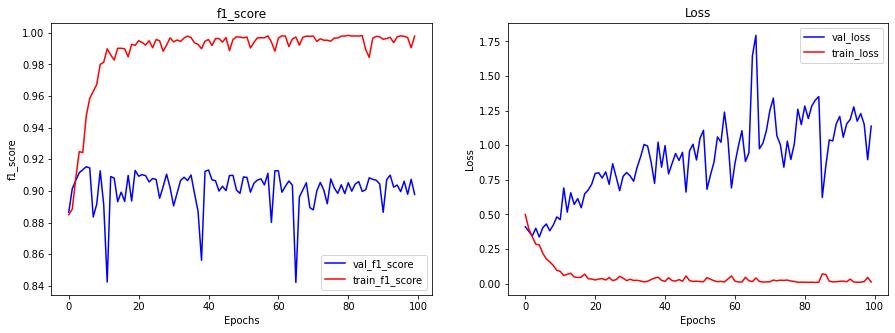

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_cnn_tn.history['val_f1_score'], color='blue', label='val_f1_score')
plt.plot(history_cnn_tn.history['f1_score'], color='red', label='train_f1_score')
plt.title('f1_score')
plt.xlabel('Epochs')
plt.ylabel('f1_score')
#plt.ylim(None, 1)
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_cnn_tn.history['val_loss'], color='blue', label='val_loss')
plt.plot(history_cnn_tn.history['loss'], color='red', label='train_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.ylim(0, None);
plt.legend();

* Treina o modelo com os melhores hiperparâmetros e com o melhor número de épocas.

In [ ]:
hypermodel_cnn = tuner_cnn.hypermodel.build(best_hps)

# Retrain the model
hypermodel_cnn.fit(
                    x=X_train_cnn, 
                    y=y_train_cnn,  
                    epochs=best_epoch,
                    batch_size=BATCH_SIZE, 
                    verbose='auto',
                    validation_data=(X_valid_cnn,y_valid_cnn)
                  )

Epoch 1/5
168/168 [==============================] - 2s 9ms/step - loss: 0.5305 - f1_score: 0.8482 - val_loss: 0.4365 - val_f1_score: 0.8917
Epoch 2/5
168/168 [==============================] - 1s 7ms/step - loss: 0.4204 - f1_score: 0.8809 - val_loss: 0.3752 - val_f1_score: 0.8889
Epoch 3/5
168/168 [==============================] - 1s 7ms/step - loss: 0.3673 - f1_score: 0.9003 - val_loss: 0.4039 - val_f1_score: 0.8429
Epoch 4/5
168/168 [==============================] - 1s 7ms/step - loss: 0.3084 - f1_score: 0.9132 - val_loss: 0.3702 - val_f1_score: 0.9139
Epoch 5/5
168/168 [==============================] - 1s 7ms/step - loss: 0.2846 - f1_score: 0.9245 - val_loss: 0.3390 - val_f1_score: 0.9159


* Calcula a loss e o F1-score para o conjunto de teste.

In [ ]:
test_loss_cnn_tn, test_f1_score_cnn_tn = hypermodel_cnn.evaluate(X_test_cnn, y_test_cnn, verbose = 'auto')

print('Test Loss:', test_loss_cnn_tn)
print('Test F1 Score:', test_f1_score_cnn_tn)

Test Loss: 0.3004152178764343
Test F1 Score: 0.9257642030715942


### Predição e Métricas de Avaliação após busca de hiperparâmetros - CNN

In [ ]:
y_predicted_hp_cnn = (hypermodel_cnn.predict(X_test_cnn) > 0.5).astype('int8')

print("\nClassification report:\n", classification_report(y_test_cnn, y_predicted_hp_cnn))
print("Confusion matrix:\n", confusion_matrix(y_test_cnn, y_predicted_hp_cnn))


Clasification report:
               precision    recall  f1-score   support

           0       0.79      0.66      0.72       131
           1       0.91      0.95      0.93       451

    accuracy                           0.88       582
   macro avg       0.85      0.81      0.82       582
weighted avg       0.88      0.88      0.88       582

Confusion matrix:
 [[ 87  44]
 [ 23 428]]


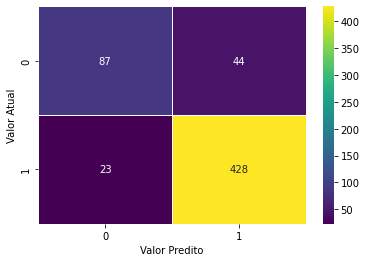

In [ ]:
cnn_confusion_matrix = pd.crosstab(np.reshape(y_test_cnn, len(y_test_cnn)), np.reshape(y_predicted_hp_cnn, len(y_predicted_hp_cnn)), rownames=['Valor Atual'], colnames=['Valor Predito'])

sn.heatmap(cnn_confusion_matrix, annot=True, fmt="d", cmap='viridis', linewidths=.5)
plt.show()

## C3: LSTM

### Divisão dos Conjuntos de Treino, Validação e Teste - LSTM

In [ ]:
seed = 1275
# Divisao da base de dados em treinamento, validacao e teste
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X, y, test_size=0.1, stratify=y, random_state=seed)
X_train_lstm, X_valid_lstm, y_train_lstm, y_valid_lstm = train_test_split(X_train_lstm, y_train_lstm, test_size = 0.2, stratify=y_train_lstm, random_state=seed)

print('Shape do Conjunto de Treino: ', X_train_lstm.shape)
print('Shape das labels de Treino: ', y_train_lstm.shape)
print('Shape do Conjunto de Validação: ', X_valid_lstm.shape)
print('Shape das labels de Validação: ', y_valid_lstm.shape)
print('Shape do Conjunto de Teste: ', X_test_lstm.shape)
print('Shape das labels de Teste: ', y_test_lstm.shape)

Shape do Conjunto de Treino:  (4188, 125, 100)
Shape das labels de Treino:  (4188,)
Shape do Conjunto de Validação:  (1047, 125, 100)
Shape das labels de Validação:  (1047,)
Shape do Conjunto de Teste:  (582, 125, 100)
Shape das labels de Teste:  (582,)


### Definição do Modelo - LSTM

In [ ]:
#vocab_size = len(model_amazon.wv.vocab)
#embedding_dim = 10

INPUT_SHAPE = (max_len,VECTOR_SIZE,)

model_lstm = Sequential([ 
                         keras.layers.LSTM(32, input_shape=INPUT_SHAPE, activation='tanh'),
                         keras.layers.Dropout(0.3),   # Regularizador
                         keras.layers.Dense(20, activation='relu'),
                         keras.layers.Dropout(0.3),   # Regularizador
                         keras.layers.Dense(10, activation='relu'),
                         keras.layers.Dropout(0.3),   # Regularizador
                         keras.layers.Dense(1, activation='sigmoid')
                        ])
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                17024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                660       
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

* Treinamento do modelo - LSTM.

In [ ]:
from tensorflow_addons.metrics.f_scores import F1Score

model_lstm.compile(loss="binary_crossentropy", optimizer="adam", metrics= F1Score(num_classes=2, average="micro", threshold=0.6))

In [ ]:
batch_size = 25    # Tamanho do batch de treinamento
n_epochs = 100

In [ ]:
callback_lstm = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10) 
# This callback will stop the training when there is no improvement inthe loss for five consecutive epochs.

history_lstm = model_lstm.fit(
                          x=X_train_lstm, 
                          y=y_train_lstm, 
                          epochs=n_epochs, 
                          batch_size=batch_size, 
                          verbose='auto', 
                          validation_data=(X_valid_lstm,y_valid_lstm),
                          callbacks=[callback_lstm],
                        )
print('\nQuantidade de épocas executadas: ', len(history_lstm.history['val_f1_score']))

Epoch 1/100
168/168 [==============================] - 5s 14ms/step - loss: 0.5543 - f1_score: 0.8254 - val_loss: 0.5270 - val_f1_score: 0.8736
Epoch 2/100
168/168 [==============================] - 2s 10ms/step - loss: 0.5171 - f1_score: 0.8542 - val_loss: 0.4701 - val_f1_score: 0.8789
Epoch 3/100
168/168 [==============================] - 2s 10ms/step - loss: 0.4816 - f1_score: 0.8546 - val_loss: 0.4281 - val_f1_score: 0.8778
Epoch 4/100
168/168 [==============================] - 2s 10ms/step - loss: 0.4598 - f1_score: 0.8589 - val_loss: 0.4114 - val_f1_score: 0.8791
Epoch 5/100
168/168 [==============================] - 2s 10ms/step - loss: 0.4414 - f1_score: 0.8612 - val_loss: 0.3999 - val_f1_score: 0.8796
Epoch 6/100
168/168 [==============================] - 2s 10ms/step - loss: 0.4431 - f1_score: 0.8354 - val_loss: 0.4442 - val_f1_score: 0.8845
Epoch 7/100
168/168 [==============================] - 2s 10ms/step - loss: 0.4233 - f1_score: 0.8754 - val_loss: 0.4043 - val_f1_score:

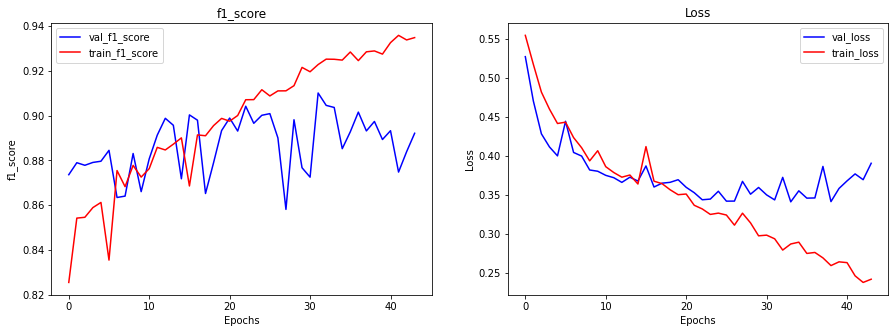

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['val_f1_score'], color='blue', label='val_f1_score')
plt.plot(history_lstm.history['f1_score'], color='red', label='train_f1_score')
plt.title('f1_score')
plt.xlabel('Epochs')
plt.ylabel('f1_score')
#plt.ylim(None, 1)
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['val_loss'], color='blue', label='val_loss')
plt.plot(history_lstm.history['loss'], color='red', label='train_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.ylim(0, None);
plt.legend();

### Predição e Métricas de Avaliação - LSTM

In [ ]:
test_loss_lstm, test_f1_score_lstm = model_lstm.evaluate(X_test_lstm, y_test_lstm, verbose = 'auto')

print('Test Loss:', test_loss_lstm)
print('Test F1 Score:', test_f1_score_lstm)

Test Loss: 0.32964596152305603
Test F1 Score: 0.912400484085083


In [ ]:
y_predicted_lstm = (model_lstm.predict(X_test_lstm) > 0.5).astype('int8')
print(np.reshape(y_predicted_lstm, len(y_predicted_lstm)))

[0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0
 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0
 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1
 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0
 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1
 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 

In [ ]:
print("\nClassification report:\n", classification_report(y_test_lstm, y_predicted_lstm))
print("Confusion matrix:\n", confusion_matrix(y_test_lstm, y_predicted_lstm))


Clasification report:
               precision    recall  f1-score   support

           0       0.73      0.77      0.75       131
           1       0.93      0.92      0.92       451

    accuracy                           0.88       582
   macro avg       0.83      0.84      0.84       582
weighted avg       0.89      0.88      0.88       582

Confusion matrix:
 [[101  30]
 [ 38 413]]


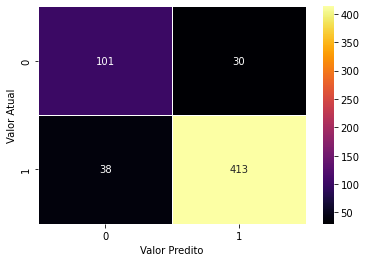

In [ ]:
lstm_confusion_matrix = pd.crosstab(np.reshape(y_test_lstm, len(y_test_lstm)), np.reshape(y_predicted_lstm, len(y_predicted_lstm)), rownames=['Valor Atual'], colnames=['Valor Predito'])

sn.heatmap(lstm_confusion_matrix, annot=True, fmt="d", cmap='inferno', linewidths=.5)
plt.show()

### Ajuste dos Hiperparâmetros com keras tuner - LSTM

* Definindo o modelo e determinando quais hiperparâmetros serão testados.

In [ ]:
from tensorflow_addons.metrics.f_scores import F1Score
METRICS_F1 = F1Score(num_classes=2, average="micro", threshold=0.6)

def model_lstm_builder(hp):
  # Hiperparameters
  #KERNEL_SIZE=3
  DROPOUT_PROB=0.30
  INPUT_SHAPE = (max_len, VECTOR_SIZE,)

  HP_LSTM_UNITS = hp.Int('units_1', min_value=16, max_value=256, step=16)
  HP_HIDDEN_LAYER_1_UNITS = hp.Int('units_2', min_value=10, max_value=100, step=10)
  HP_HIDDEN_LAYER_2_UNITS = hp.Int('units_3', min_value=10, max_value=50, step=10)

  INPUT_SHAPE = (max_len,VECTOR_SIZE,)

  model_lstm_tn = Sequential([ 
                         keras.layers.LSTM(32, input_shape=INPUT_SHAPE, activation='tanh'),
                         keras.layers.Dropout(DROPOUT_PROB),   # Regularizador
                         keras.layers.Dense(20, activation='relu'),
                         keras.layers.Dropout(DROPOUT_PROB),   # Regularizador
                         keras.layers.Dense(10, activation='relu'),
                         keras.layers.Dropout(DROPOUT_PROB),   # Regularizador
                         keras.layers.Dense(1, activation='sigmoid')
                        ])

  HP_LEARNING_RATE = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5, 1e-6])

  model_lstm_tn.compile(
      loss="binary_crossentropy", 
      optimizer=keras.optimizers.Adam(learning_rate=HP_LEARNING_RATE), 
      metrics=METRICS_F1
  )

  return model_lstm_tn

* Definindo o objetivo da busca de hiperparâmetros e determinando o número máximo de épocas.

In [ ]:
MAX_EPOCHS = 150

tuner_lstm = kt.Hyperband(
                          model_lstm_builder,
                          objective= kt.Objective("val_loss", direction="min"),
                          max_epochs=MAX_EPOCHS,
                          factor=3,
                          directory='lstm_tuner_dir_1',
                          project_name='lstm_tuner_4'
                        )
#tuner_cnn.search_space_summary()

* Executa a busca de hiperparâmetros.

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

BATCH_SIZE = 25    # Tamanho do batch de treinamento
N_EPOCHS = 100

tuner_lstm.search(
                  x=X_train_lstm, 
                  y=y_train_lstm, 
                  epochs=N_EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  #verbose='auto', 
                  validation_data=(X_valid_lstm,y_valid_lstm),
                  callbacks=[stop_early],
                )

Trial 254 Complete [00h 01m 19s]
val_loss: 0.3216018080711365

Best val_loss So Far: 0.31673890352249146
Total elapsed time: 01h 52m 37s
INFO:tensorflow:Oracle triggered exit


* Exibe os melhores hiperparâmetros encontrados durante a busca.

In [ ]:
# Get the optimal hyperparameters
best_hps_lstm=tuner_lstm.get_best_hyperparameters(num_trials=1)[0]

for h_param in ['units_1', 'units_2', 'units_3'] + ['learning_rate']:
  print(h_param, best_hps_lstm.get(h_param))

units_1 112
units_2 100
units_3 20
learning_rate 0.001


* Encontra o número ótimo de épocas para treinar o modelo com os hiperparâmetros obtidos na busca.

In [ ]:
# Encontre o número ótimo de épocas para treinar o modelo com os hiperparâmetros obtidos na busca

# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model_lstm_tn = tuner_lstm.hypermodel.build(best_hps_lstm)

history_lstm_tn = model_lstm_tn.fit(
                                    x=X_train_lstm, 
                                    y=y_train_lstm, 
                                    epochs=N_EPOCHS, 
                                    batch_size=BATCH_SIZE, 
                                    verbose='auto',
                                    validation_data=(X_valid_lstm,y_valid_lstm)
                                  )

val_loss_per_epoch = history_lstm_tn.history['val_loss']
best_epoch = val_loss_per_epoch.index(min(val_loss_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/100
168/168 [==============================] - 4s 15ms/step - loss: 0.5530 - f1_score: 0.8247 - val_loss: 0.4854 - val_f1_score: 0.8736
Epoch 2/100
168/168 [==============================] - 2s 9ms/step - loss: 0.5098 - f1_score: 0.8497 - val_loss: 0.4660 - val_f1_score: 0.8638
Epoch 3/100
168/168 [==============================] - 2s 9ms/step - loss: 0.4681 - f1_score: 0.8527 - val_loss: 0.4169 - val_f1_score: 0.8815
Epoch 4/100
168/168 [==============================] - 2s 9ms/step - loss: 0.4504 - f1_score: 0.8590 - val_loss: 0.4112 - val_f1_score: 0.8694
Epoch 5/100
168/168 [==============================] - 1s 9ms/step - loss: 0.4389 - f1_score: 0.8566 - val_loss: 0.4035 - val_f1_score: 0.8675
Epoch 6/100
168/168 [==============================] - 2s 9ms/step - loss: 0.4314 - f1_score: 0.8564 - val_loss: 0.3963 - val_f1_score: 0.8612
Epoch 7/100
168/168 [==============================] - 2s 9ms/step - loss: 0.4101 - f1_score: 0.8662 - val_loss: 0.3863 - val_f1_score: 0.895

Epoch 58/100
168/168 [==============================] - 1s 9ms/step - loss: 0.1781 - f1_score: 0.9517 - val_loss: 0.4348 - val_f1_score: 0.8979
Epoch 59/100
168/168 [==============================] - 1s 9ms/step - loss: 0.1656 - f1_score: 0.9598 - val_loss: 0.4863 - val_f1_score: 0.8896
Epoch 60/100
168/168 [==============================] - 2s 9ms/step - loss: 0.1693 - f1_score: 0.9566 - val_loss: 0.4963 - val_f1_score: 0.9040
Epoch 61/100
168/168 [==============================] - 1s 9ms/step - loss: 0.1688 - f1_score: 0.9557 - val_loss: 0.4795 - val_f1_score: 0.8958
Epoch 62/100
168/168 [==============================] - 2s 9ms/step - loss: 0.1644 - f1_score: 0.9577 - val_loss: 0.5245 - val_f1_score: 0.8996
Epoch 63/100
168/168 [==============================] - 2s 9ms/step - loss: 0.1546 - f1_score: 0.9595 - val_loss: 0.4935 - val_f1_score: 0.8950
Epoch 64/100
168/168 [==============================] - 2s 9ms/step - loss: 0.1506 - f1_score: 0.9636 - val_loss: 0.6018 - val_f1_score:

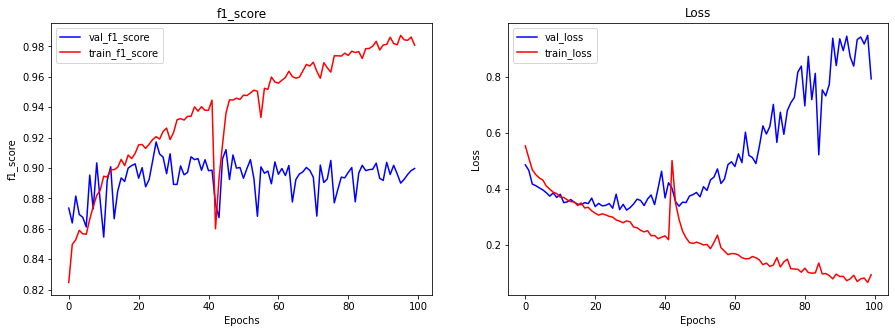

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_lstm_tn.history['val_f1_score'], color='blue', label='val_f1_score')
plt.plot(history_lstm_tn.history['f1_score'], color='red', label='train_f1_score')
plt.title('f1_score')
plt.xlabel('Epochs')
plt.ylabel('f1_score')
#plt.ylim(None, 1)
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_lstm_tn.history['val_loss'], color='blue', label='val_loss')
plt.plot(history_lstm_tn.history['loss'], color='red', label='train_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.ylim(0, None);
plt.legend();

* Treina o modelo com os melhores hiperparâmetros e com o melhor número de épocas.

In [ ]:
hypermodel_lstm = tuner_lstm.hypermodel.build(best_hps_lstm)

# Retrain the model
hypermodel_lstm.fit(
                    x=X_train_lstm, 
                    y=y_train_lstm,  
                    epochs=best_epoch,
                    batch_size=BATCH_SIZE, 
                    verbose='auto',
                    validation_data=(X_valid_lstm,y_valid_lstm)
                  )

Epoch 1/30
168/168 [==============================] - 7s 14ms/step - loss: 0.5547 - f1_score: 0.8418 - val_loss: 0.5300 - val_f1_score: 0.8736
Epoch 2/30
168/168 [==============================] - 2s 9ms/step - loss: 0.5177 - f1_score: 0.8586 - val_loss: 0.4478 - val_f1_score: 0.8820
Epoch 3/30
168/168 [==============================] - 1s 9ms/step - loss: 0.4711 - f1_score: 0.8517 - val_loss: 0.4225 - val_f1_score: 0.8480
Epoch 4/30
168/168 [==============================] - 1s 9ms/step - loss: 0.4414 - f1_score: 0.8558 - val_loss: 0.4167 - val_f1_score: 0.8626
Epoch 5/30
168/168 [==============================] - 2s 9ms/step - loss: 0.4377 - f1_score: 0.8570 - val_loss: 0.3961 - val_f1_score: 0.8854
Epoch 6/30
168/168 [==============================] - 2s 9ms/step - loss: 0.4150 - f1_score: 0.8650 - val_loss: 0.3830 - val_f1_score: 0.8738
Epoch 7/30
168/168 [==============================] - 1s 9ms/step - loss: 0.4089 - f1_score: 0.8725 - val_loss: 0.3886 - val_f1_score: 0.8865
Epoch

* Calcula a loss e o F1-score para o conjunto de teste.

In [ ]:
test_loss_lstm_tn, test_f1_score_lstm_tn = hypermodel_lstm.evaluate(X_test_lstm, y_test_lstm, verbose = 'auto')

print('Test Loss:', test_loss_lstm_tn)
print('Test F1 Score:', test_f1_score_lstm_tn)

Test Loss: 0.30486801266670227
Test F1 Score: 0.9074285626411438


### Predição e Métricas de Avaliação após busca de hiperparâmetros - LSTM

In [ ]:
y_predicted_hp_lstm = (hypermodel_lstm.predict(X_test_lstm) > 0.5).astype('int8')

print("\nClassification report:\n", classification_report(y_test_lstm, y_predicted_hp_lstm))
print("Confusion matrix:\n", confusion_matrix(y_test_lstm, y_predicted_hp_lstm))


Clasification report:
               precision    recall  f1-score   support

           0       0.72      0.75      0.73       131
           1       0.93      0.91      0.92       451

    accuracy                           0.88       582
   macro avg       0.82      0.83      0.83       582
weighted avg       0.88      0.88      0.88       582

Confusion matrix:
 [[ 98  33]
 [ 39 412]]


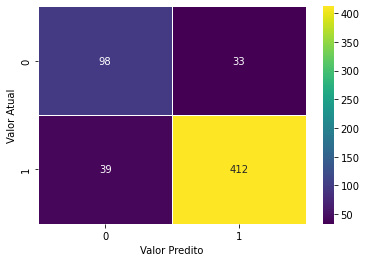

In [ ]:
lstm_confusion_matrix = pd.crosstab(np.reshape(y_test_lstm, len(y_test_lstm)), np.reshape(y_predicted_hp_lstm, len(y_predicted_hp_lstm)), rownames=['Valor Atual'], colnames=['Valor Predito'])

sn.heatmap(lstm_confusion_matrix, annot=True, fmt="d", cmap='viridis', linewidths=.5)
plt.show()

## C4: BERT

* O BERT foi implementado em um notebook a parte e está disponível no repositório do GitHub do projeto na pasta "notebooks".

# Etapa 4: Resumo das Melhores Métricas para Todos os Modelos
* Random Forest, CNN e LSTM em duas condições:
  1. Sem o uso de `stemming`;
  2. Com o uso de `stemming`.
* BERT.

### Sem Stemming

| Modelo            | Classe   | Precision | Recall | F1 Score |
|------------------:|--------: |:---------:|:------:|:--------:|
| **Random Forest** | Negativa | 0.93      | 0.05   | 0.10     |
|                   | Positiva | 0.79      | 1.00   | 0.88     |
| **CNN**           | Negativa | 0.79      | 0.66   | 0.72     |
|                   | Positiva | 0.91      | 0.95   | 0.93     |
| **LSTM**          | Negativa | 0.73      | 0.77   | 0.75     |
|                   | Positiva | 0.93      | 0.92   | 0.92     |

### Com Stemming

| Modelo            | Classe   | Precision | Recall | F1 Score |
|------------------:|--------: |:---------:|:------:|:--------:|
| **Random Forest** | Negativa | 0.53      | 0.07   | 0.12     |
|                   | Positiva | 0.78      | 0.98   | 0.87     |
| **CNN**           | Negativa | 0.81      | 0.62   | 0.70     |
|                   | Positiva | 0.90      | 0.96   | 0.93     |
| **LSTM**          | Negativa | 0.55      | 0.76   | 0.63     |
|                   | Positiva | 0.92      | 0.82   | 0.86     |

### BERT

| Modelo    | Classe   | Precision | Recall | F1 Score |
|----------:|--------: |:---------:|:------:|:--------:|
| **BERT**  | Negativa | 0.83      | 0.84   | 0.83     |
|           | Positiva | 0.95      | 0.95   | 0.95     |